# Render Environments

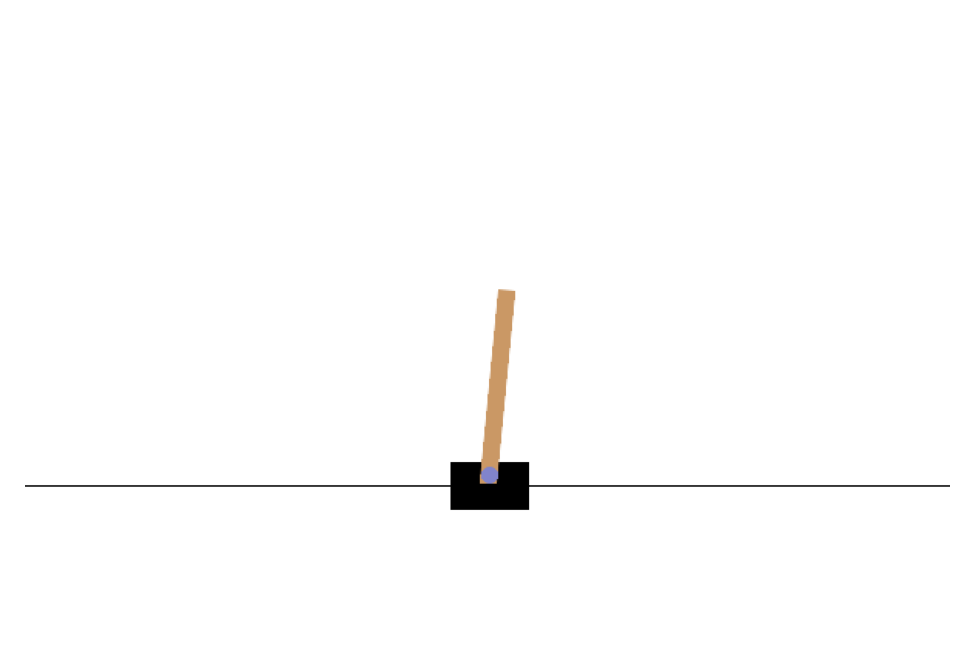

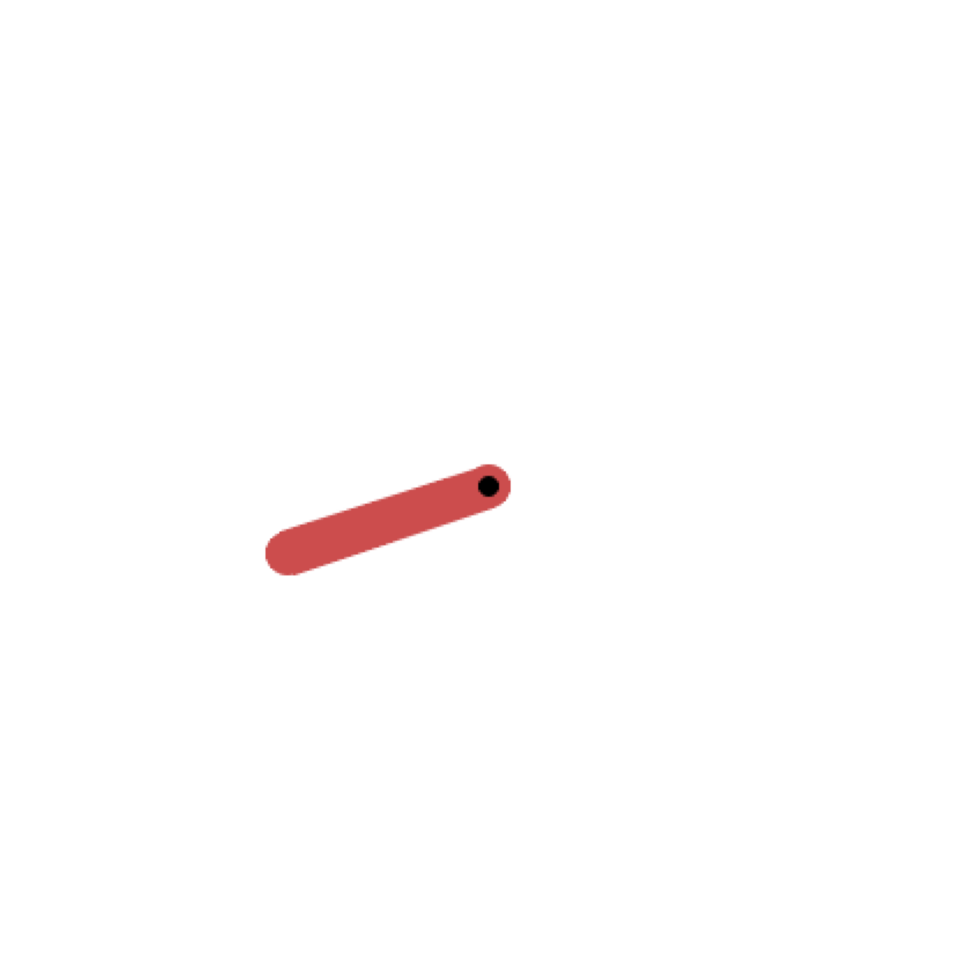

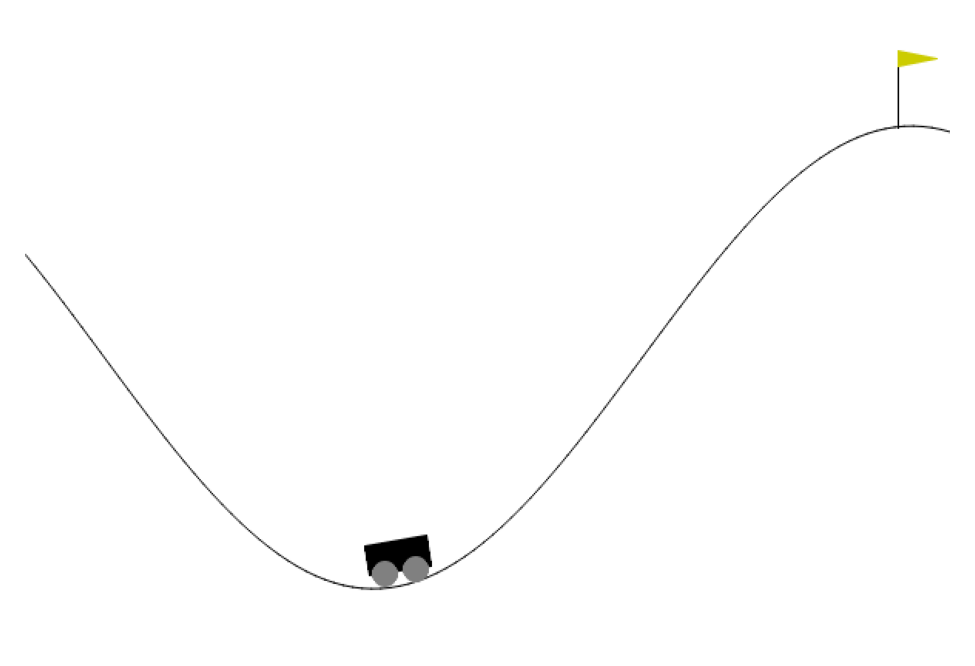

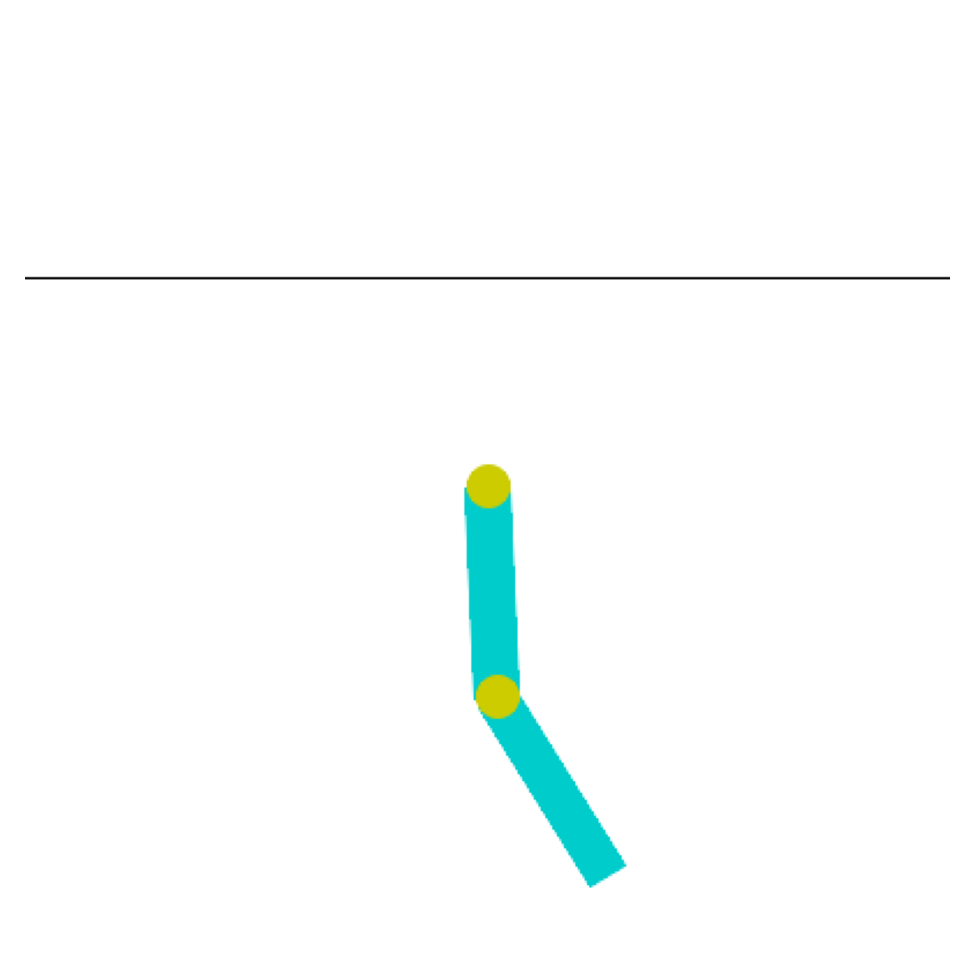

In [7]:
# flake8: noqa: F401
# type: ignore
import matplotlib.pyplot as plt
from pathlib import Path

from carl.envs import CARLDmcFishEnv
from carl.envs import CARLDmcQuadrupedEnv
from carl.envs import CARLDmcWalkerEnv
from carl.envs.carl_env import CARLEnv
from carl.envs import CARLUr5e, CARLLunarLanderEnv, CARLCartPoleEnv, CARLPendulumEnv, CARLMountainCarEnv, CARLVehicleRacingEnv, CARLAcrobotEnv, CARLBipedalWalkerEnv, CARLAnt, CARLFetch, CARLGrasp, CARLHumanoid, CARLHalfcheetah
from brax.envs.wrappers import GymWrapper

def render(self, mode='rgb_array', **kwargs):
    # pylint:disable=g-import-not-at-top
    from brax.io import image
    if mode == 'rgb_array':
      sys, qp = self._env.sys, self._state.qp
      print(kwargs)
      if not kwargs:
          kwargs = dict(width=256, height=256)
      return image.render_array(sys, qp, **kwargs)
    else:
      return super().render(mode=mode)  # just raise an exception


def render_env(env: CARLEnv, n_steps: int = 0):
    s = env.reset()
    for i in range(n_steps):
        action = env.action_space.sample()
        state, reward, done, info = env.step(action=action)

    env_name = type(env).__name__
    kwargs = {}
    if "Dmc" in env_name:
        kwargs = dict(width=400, height=400, camera_id=0)
    elif type(env.env) == GymWrapper:
        # env.env.render = render
        # kwargs = dict(width=400, height=400, camera=0)
        kwargs = {}
    elif type(env) == CARLAcrobotEnv:
        env.env.SCREEN_DIM = 400
    elif type(env) == CARLPendulumEnv:
        env.env.screen_dim = 400

    img = env.render(mode="rgb_array", **kwargs)
    fig = plt.figure(figsize=(4, 4), dpi=250)
    ax = fig.add_subplot(111)
    ax.imshow(img)
    ax.axis("off")
    fig.set_tight_layout(True)
    plt.show()
    fig_fn = Path(f"./renders/render_{env_name}.png")
    fig_fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fig_fn, bbox_inches="tight", dpi=250)


envs = [
    # (CARLDmcWalkerEnv(task="walk_context"), 0),
    # (CARLDmcQuadrupedEnv(task="walk_context"), 0),
    # (CARLDmcFishEnv(task="upright_context"), 0),
    # (CARLLunarLanderEnv(), 40),
    # (CARLCartPoleEnv(), 0),
    # (CARLPendulumEnv(), 0),
    # (CARLMountainCarEnv(), 0),
    # (CARLAcrobotEnv(), 50),
    # (CARLMarioEnv(), 0),
    # (CARLVehicleRacingEnv(), 0),
    # (CARLBipedalWalkerEnv(), 20),
    # (CARLAnt(), 0),
    # (CARLFetch(), 0),
    # (CARLGrasp(), 0),
    # (CARLHumanoid(), 0),
    # (CARLHalfcheetah(), 0),
    # (CARLUr5e(), 0),
]
for env, n_steps in envs:
    render_env(env=env, n_steps=n_steps)


In [3]:
module_name = CARLAnt.__module__
print(module_name)
families = ["classic_control", "box2d", "brax", "dmc"]

carl.envs.brax.carl_ant
